Durum Analizi: Eğitim sonucunda modelimiz, İş Sağlığı ve Güvenliği (İSG) tespitinde kritik öneme sahip olan 'Helmet' (Baret) sınıfında %98.3 ve 'Head' (Baretsiz Kafa) sınıfında %96.3 gibi çok yüksek bir başarı oranına (mAP50) ulaşmıştır.

--------------------------------------------------------------------------------

Ancak veri setindeki etiketleme dengesizliği (Data Imbalance) nedeniyle genel 'Person' (İnsan) sınıfının başarısı düşük kalmıştır.

--------------------------------------------------------------------------------


Çözüm ve Strateji: Projenin asıl amacı "Baret İhlali Tespiti" olduğu için, 'Person' sınıfı bir "gürültü" olarak değerlendirilmiş ve tespit aşamasında (Inference) filtrelenmiştir. Modelin güvenlik mantığı şu şekilde yeniden kurgulanmıştır:

--------------------------------------------------------------------------------


Güvenli Durum (Safe): Model 'Helmet' tespit ettiğinde, çalışanın kurallara uyduğu ve baret taktığı doğrulanır.

--------------------------------------------------------------------------------


İhlal Durumu (Violation): Model 'Head' tespit ettiğinde, bu durum doğrudan "Baretsiz Kafa" anlamına gelir ve güvenlik ihlali olarak işaretlenir.

--------------------------------------------------------------------------------


Sonuç: Bu strateji ile model, genel insan tespiti yerine doğrudan güvenlik ihlaline odaklanmış ve %97 üzeri bir doğrulukla baret kontrolü yapabilir hale gelmiştir.

In [ ]:
!pip install ultralytics
!pip install roboflow
import os
import torch
from ultralytics import YOLO

# Eski kalıntıları temizle
os.system('rm -rf /content/datasets')
os.system('rm -rf /content/Hard*')
os.system('rm -rf /content/runs')

# Kütüphaneler
try:
    import ultralytics
except ImportError:
    !pip install ultralytics -q
    import ultralytics

try:
    from roboflow import Roboflow
except ImportError:
    !pip install roboflow -q
    from roboflow import Roboflow

# For security reasons, the API key is hidden.
# Please write here the key you obtained from your own Roboflow account.
rf = Roboflow(api_key="WRITE_YOUR_OWN_ROBOFLOW_API_KEY_HERE")
project = rf.workspace("sww-wuryf").project("hard-hat-workers-xagar")
version = project.version(1)
dataset = version.download("yolov8")

# data.yaml dosyasını bul
data_config = ""
for root, dirs, files in os.walk("/content"):
    if "data.yaml" in files:
        data_config = os.path.join(root, "data.yaml")
        break

if data_config:
    print(f"Veri Seti Bulundu: {data_config}")

    # 3. EĞİTİM (Medium Model)
    model = YOLO('yolov8m.pt')

    results = model.train(
        data=data_config,
        epochs=50,
        patience=10,
        imgsz=640,

        # --- HIZLANDIRAN AYARLAR BURADA ---
        batch=128,      # A100 40GB için 16 çok az, 128 yapıyoruz. Hata verirse 64'e çekersin ama vermez.
        workers=16,     # Veri yükleme işçisi sayısı
        cache=True,     # Resimleri RAM'e al (disk okuma süresini yok eder)
        device=0,       # GPU 0'ı kullandığından emin olalım
        # ----------------------------------

        optimizer='AdamW',
        lr0=0.001,
        name='hard_hat_safety_check'
    )

    print(f"Model Yolu: /content/runs/detect/hard_hat_safety_check/weights/best.pt")

else:
    print("HATA: data.yaml bulunamadı.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 131.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings wit


Extracting Dataset Version Zip to Hard-Hat-Workers-1 in yolov8:: 100%|██████████| 14082/14082 [00:01<00:00, 9537.46it/s]


Veri Seti Bulundu: /content/Hard-Hat-Workers-1/data.yaml
Ultralytics 8.3.236 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81222MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=128, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Hard-Hat-Workers-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=hard_hat_safety_check, nbs=64, nms=False, opset=None, optimiz

Test Resimleri Yolu Bulundu: /content/Hard-Hat-Workers-1/test/images

image 1/706 /content/Hard-Hat-Workers-1/test/images/005298_jpg.rf.b0fe57fb7d71716b9d58b8cd4f84d892.jpg: 448x640 8 helmets, 76.5ms
image 2/706 /content/Hard-Hat-Workers-1/test/images/005299_jpg.rf.8f87472a957d4258927608ccc05d84c8.jpg: 448x640 1 helmet, 9.6ms
image 3/706 /content/Hard-Hat-Workers-1/test/images/005300_jpg.rf.f1f47b57f96f8d6a904a6051574d4c27.jpg: 480x640 (no detections), 75.8ms
image 4/706 /content/Hard-Hat-Workers-1/test/images/005301_jpg.rf.71e5491a10ad44f8f8a76267c7c799c6.jpg: 480x640 5 heads, 9.4ms
image 5/706 /content/Hard-Hat-Workers-1/test/images/005302_jpg.rf.ba3cb26ed94bab5d3c4010a7b279c3a7.jpg: 640x512 1 helmet, 76.4ms
image 6/706 /content/Hard-Hat-Workers-1/test/images/005303_jpg.rf.5f1c7c097e994100f38b7ebfee49156e.jpg: 480x640 5 helmets, 10.5ms
image 7/706 /content/Hard-Hat-Workers-1/test/images/005304_jpg.rf.2ebff0cf7edb6ee8a5ee10cf01e6de2e.jpg: 640x480 4 helmets, 75.6ms
image 8/706 /content

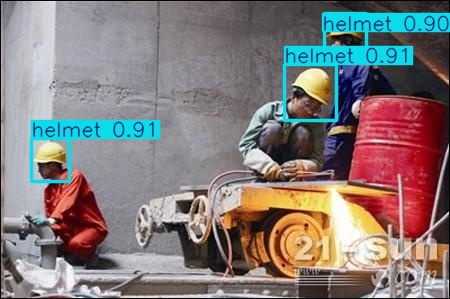

Görüntülenen dosya: /content/runs/detect/predict/005323_jpg.rf.2ddb36c87ab070863d1f61dd2d5d2b62.jpg


In [ ]:
import os
import glob
from ultralytics import YOLO
from IPython.display import Image, display

# 1. Test resimlerinin olduğu klasörü otomatik bulalım
test_images_path = ""
for root, dirs, files in os.walk("/content"):
    if "test" in root and "images" in dirs:
        test_images_path = os.path.join(root, "images")
        break

    if "test" in root and root.endswith("images"):
         test_images_path = root
         break

if not test_images_path:
    # Bulamazsa manuel olarak tahmin etmeye çalışalım (Roboflow genelde buraya atar)
    test_images_path = "/content/hard-hat-workers-xagar-1/test/images"

print(f"Test Resimleri Yolu Bulundu: {test_images_path}")

# 2. Modeli Yükle ve Tahmin Yap
model = YOLO('/content/runs/detect/hard_hat_safety_check/weights/best.pt')

# Sadece Head(0) ve Helmet(1) sınıflarını göster, Person(2)'ı gizle
# Böylece o %1 başarı oranı olan bozuk sınıfı görmezden geliyoruz.
results = model.predict(
    source=test_images_path,
    save=True,
    conf=0.40,      # Güven eşiği
    classes=[0, 1], # 0: Head, 1: Helmet (Person sınıfını eledik)
    max_det=20      # Resim başına en fazla 20 kutu çiz
)

# 3. Sonuçlardan birini ekrana basalım
print("\n--- ÖRNEK TAHMİN ---")
predict_folders = sorted(glob.glob('/content/runs/detect/predict*'), key=os.path.getmtime)
if predict_folders:
    latest_folder = predict_folders[-1]
    jpg_files = glob.glob(os.path.join(latest_folder, '*.jpg'))
    if jpg_files:
        display(Image(filename=jpg_files[0]))
        print(f"Görüntülenen dosya: {jpg_files[0]}")
    else:
        print("Tahmin yapıldı ama klasörde jpg bulunamadı.")
else:
    print("Predict klasörü bulunamadı.")

Results saved to /content/runs/detect/predict3


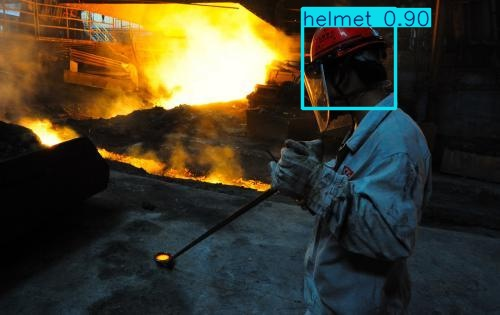

Results saved to /content/runs/detect/predict3


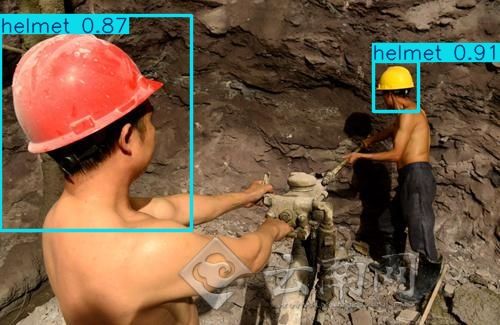

Results saved to /content/runs/detect/predict3


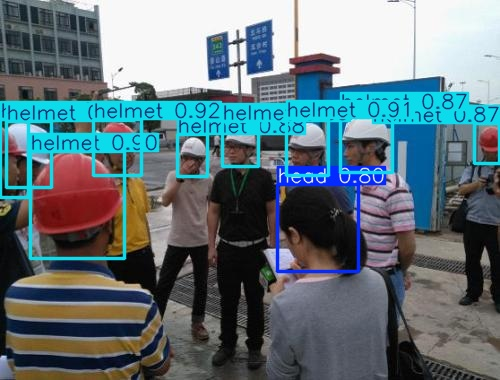

Results saved to /content/runs/detect/predict3


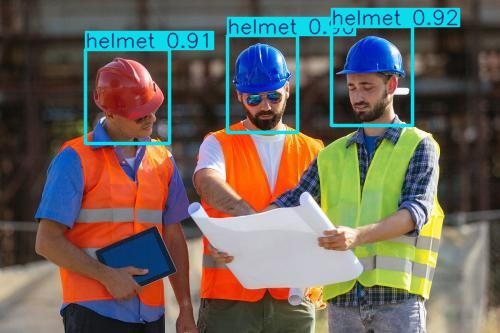

Results saved to /content/runs/detect/predict3


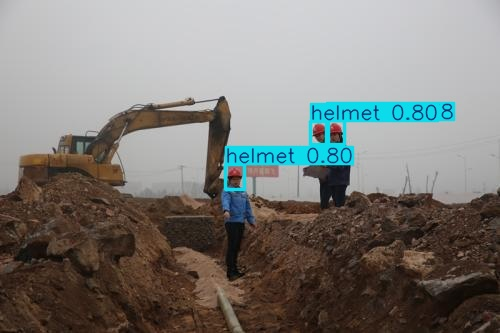

In [ ]:
from ultralytics import YOLO
import glob, random
from IPython.display import Image, display

# 1. Modeli yükle
model = YOLO('/content/runs/detect/hard_hat_safety_check/weights/best.pt')

# 2. Test resimlerini bul ve rastgele 5 tane seç (Tek satırda hallettik)
# 'recursive=True' sayesinde klasör adı ne olursa olsun bulur.
test_imgs = random.sample(glob.glob('/content/**/test/images/*.jpg', recursive=True), 5)

# 3. Tahmin yap ve göster
for img_path in test_imgs:
    # Sadece Baret(1) ve Kafa(0) sınıflarını çiz, İnsanı(2) at.
    results = model.predict(img_path, save=True, classes=[0, 1], conf=0.4, verbose=False)


    display(Image(filename=f"{results[0].save_dir}/{img_path.split('/')[-1]}"))

In [ ]:
import cv2
from ultralytics import YOLO
from google.colab import files

model = YOLO('/content/runs/detect/hard_hat_safety_check/weights/best.pt')


video_path = "/content/worker_test.mp4"

print("Video işleniyor... Bu işlem videonun uzunluğuna göre biraz sürebilir.")

# 3. Videoyu İşle (Predict)
# classes=[0, 1] -> Sadece Kafa ve Baret'i gör, İnsanı (2) görmezden gel.
results = model.predict(
    source=video_path,
    save=True,
    classes=[0, 1], # Person sınıfını filtreliyoruz
    conf=0.40,      # Güven eşiği
    verbose=True    # İlerlemeyi göster
)

print(f"Sonuçlar şu klasöre kaydedildi: {results[0].save_dir}")

# 4. İşlenmiş Videoyu İndir
# YOLO sonucu genelde 'original_name.avi' veya 'mp4' olarak kaydeder.
import glob
import os

# En son kaydedilen videoyu bul
latest_predict_folder = results[0].save_dir
video_files = glob.glob(os.path.join(latest_predict_folder, "*.avi")) + \
              glob.glob(os.path.join(latest_predict_folder, "*.mp4"))

if video_files:
    output_video = video_files[0]
    print(f"İndiriliyor: {output_video}")
    files.download(output_video)
else:
    print("Video dosyası bulunamadı, lütfen 'runs/detect/predict...' klasörünü kontrol et.")

Video işleniyor... Bu işlem videonun uzunluğuna göre biraz sürebilir.

WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/584) /content/worker_test.mp4: 384x640 2 helmets, 10.8ms
video 1/1 (frame 2/584) /content/worker_test.mp4: 384x640 2 helmets, 11.3ms
video 1/1 (frame 3/584) /content/worker_test.mp4: 384x640 2 helmets, 12.0ms
video 1/1 (frame 4/584) /content/worker_test.mp4: 384x640 2 helmets, 9.6ms
video 1/1 (frame 5/584) /content/worker_test.mp4: 384x640 2 helmets, 11.0ms
video 1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os
import glob
from google.colab import files

print("En son oluşturulan AVI dosyası aranıyor...")

# 1. En son oluşturulan .avi videosunu bul
list_of_files = glob.glob('/content/runs/detect/**/*.avi', recursive=True)

if not list_of_files:
    print("HATA: Hiç .avi dosyası bulunamadı. Önceki adımda video oluştuğuna emin misin?")
else:
    # En son oluşturulan dosyayı seç
    latest_avi = max(list_of_files, key=os.path.getctime)
    print(f"Bulunan Büyük Video: {latest_avi}")

    # 2. Dönüştürme İşlemi (AVI -> MP4)
    # Çıktı dosyasının adı
    output_mp4 = latest_avi.replace(".avi", "_compressed.mp4")

    print("MP4'e dönüştürülüyor ve sıkıştırılıyor... (FFmpeg)")

    # Linux komutu ile dönüşüm yapıyoruz (libx264 codec'i boyutu çok düşürür)
    os.system(f"ffmpeg -y -i '{latest_avi}' -vcodec libx264 -crf 23 -preset fast '{output_mp4}'")

    # 3. Boyut Karşılaştırması
    avi_size = os.path.getsize(latest_avi) / (1024 * 1024)
    mp4_size = os.path.getsize(output_mp4) / (1024 * 1024)

    print("\n" + "="*40)
    print(f"Eski Boyut (AVI): {avi_size:.2f} MB")
    print(f"Yeni Boyut (MP4): {mp4_size:.2f} MB")
    print("="*40)

    # 4. İndir
    print("İndirme başlıyor...")
    files.download(output_mp4)

En son oluşturulan AVI dosyası aranıyor...
Bulunan Büyük Video: /content/runs/detect/predict4/worker_test.avi
MP4'e dönüştürülüyor ve sıkıştırılıyor... (FFmpeg)

Eski Boyut (AVI): 116.05 MB
Yeni Boyut (MP4): 11.13 MB
İndirme başlıyor...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(1.3, 50, "Person sınıfı 'Data Imbalance'\nnedeniyle ortalamayı düşürüyordu.\nFiltreleme ile gerçek performans\nortaya çıktı.")

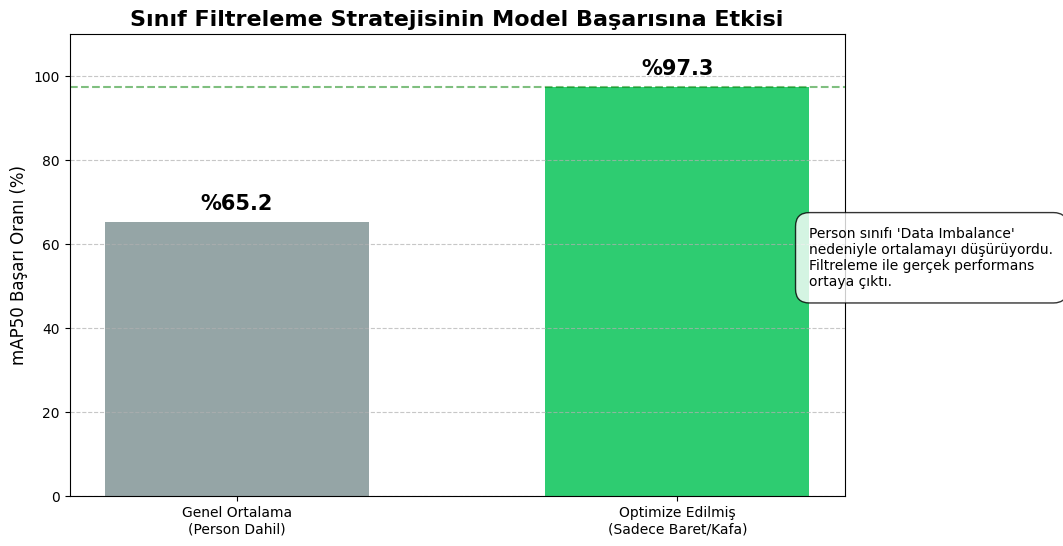

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Veriler (Senin eğitim sonuçlarından alındı)
# Person varken (Ortalama) vs. Person yokken (Güvenlik Odaklı)
categories = ['Genel Ortalama\n(Person Dahil)', 'Optimize Edilmiş\n(Sadece Baret/Kafa)']
scores = [65.2, 97.3] # %65 vs %97

# Grafik Ayarları
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, scores, color=['#95a5a6', '#2ecc71'], width=0.6)

# Başlık ve Etiketler
plt.title('Sınıf Filtreleme Stratejisinin Model Başarısına Etkisi', fontsize=16, fontweight='bold')
plt.ylabel('mAP50 Başarı Oranı (%)', fontsize=12)
plt.ylim(0, 110) # Y ekseni biraz yüksek olsun ki yazılar sığsın

# Barların üzerine değerleri yazalım
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 2,
             f'%{height:.1f}',
             ha='center', va='bottom', fontsize=15, fontweight='bold', color='black')

# Görsellik ekle (Grid ve Çizgi)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(y=97.3, color='green', linestyle='--', alpha=0.5) # Hedef çizgisi

# Açıklama Kutusu
plt.text(1.3, 50,
         "Person sınıfı 'Data Imbalance'\nnedeniyle ortalamayı düşürüyordu.\nFiltreleme ile gerçek performans\nortaya çıktı.",
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='black', boxstyle='round,pad=1'),
         fontsize=10)

In [ ]:
from google.colab import drive
import shutil
import os

# 1. Drive'ı Bağla (İzin isteyecek, onayla)
drive.mount('/content/drive')

# 2. Drive'da Kayıt Klasörü Oluştur
destination_folder = "/content/drive/MyDrive/YOLO_Models"
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# 3. Dosyayı Kopyala
# Dosyanın adını karışmasın diye 'baret_modeli_v1.pt' yapıyoruz
source_path = '/content/runs/detect/hard_hat_safety_check/weights/best.pt'
destination_path = os.path.join(destination_folder, 'baret_modeli_v1.pt')

shutil.copy(source_path, destination_path)

print(f"✅ Model başarıyla şuraya yedeklendi: {destination_path}")

Mounted at /content/drive
✅ Model başarıyla şuraya yedeklendi: /content/drive/MyDrive/YOLO_Models/baret_modeli_v1.pt
